In [152]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [153]:
#loading the datset
df=pd.read_csv('Metadata_Country.csv')
df.head()

,Country Code,Region,IncomeGroup,SpecialNotes,TableName,Unnamed: 5
0,ABW,Latin America & Caribbean,High income,NaN,Aruba,NaN
1,AFE,NaN,NaN,"26 countries, stretching from the Red Sea in t...",Africa Eastern and Southern,NaN
2,AFG,South Asia,Low income,The reporting period for national accounts dat...,Afghanistan,NaN
3,AFW,NaN,NaN,"22 countries, stretching from the westernmost ...",Africa Western and Central,NaN
4,AGO,Sub-Saharan Africa,Lower middle income,The World Bank systematically assesses the app...,Angola,NaN


In [154]:
#checking the missing values
df.isna().sum()/len(df)*100

Country Code      0.000000
Region           18.113208
IncomeGroup      18.490566
SpecialNotes     52.452830
TableName         0.000000
Unnamed: 5      100.000000
dtype: float64

In [155]:
# Identify the column(s) with missing values
column_with_missing_values = 'Region'

# Compute the mode
mode_value = df[column_with_missing_values].mode()[0]
print(mode_value)
# Fill the missing values with mode
df[column_with_missing_values].fillna(mode_value, inplace=True)

# Verify the changes
print(df[column_with_missing_values].isnull().sum())

Europe & Central Asia
0


In [156]:
# Identify the column(s) with missing values
column_with_missing_values = 'IncomeGroup'

# Compute the mode
mode_value = df[column_with_missing_values].mode()[0]
print(mode_value)
# Fill the missing values with mode
df[column_with_missing_values].fillna(mode_value, inplace=True)

# Verify the changes
print(df[column_with_missing_values].isnull().sum())

High income
0


In [157]:
# remove the unwanted columns
df.drop(columns=['SpecialNotes', 'Unnamed: 5'], inplace=True)
#checking the missing values
df.isna().sum()/len(df)*100

Country Code    0.0
Region          0.0
IncomeGroup     0.0
TableName       0.0
dtype: float64

In [158]:
#checking if there is duplicate value
df.duplicated().sum()

0

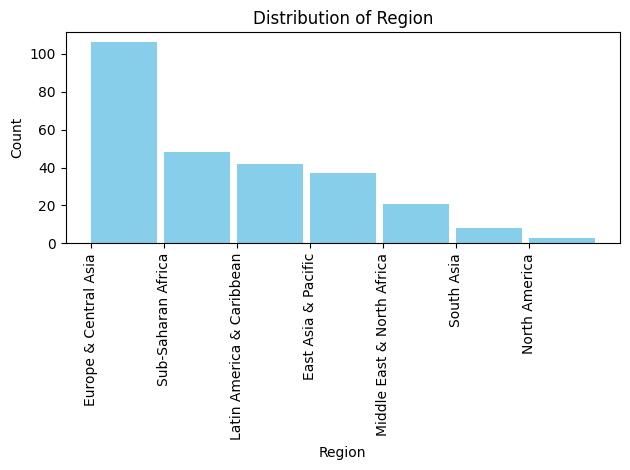

In [159]:
region_counts=df['Region'].value_counts()
x=range(len(region_counts.index))

plt.bar(region_counts.index,region_counts.values,align='edge',color='skyblue',width=0.9)

plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Distribution of Region')

plt.xticks(x,region_counts.index,rotation=90)
plt.tight_layout()
plt.show()

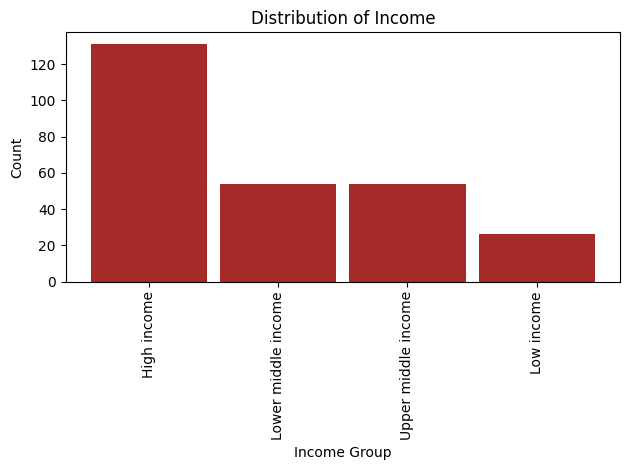

In [160]:
income_counts=df['IncomeGroup'].value_counts()
x=range(len(income_counts.index))

plt.bar(income_counts.index,income_counts.values,align='center',color='brown',width=0.9)

plt.xlabel('Income Group')
plt.ylabel('Count')
plt.title('Distribution of Income')

plt.xticks(x,income_counts.index,rotation=90)
plt.tight_layout()
plt.show()

<Axes: xlabel='Region'>

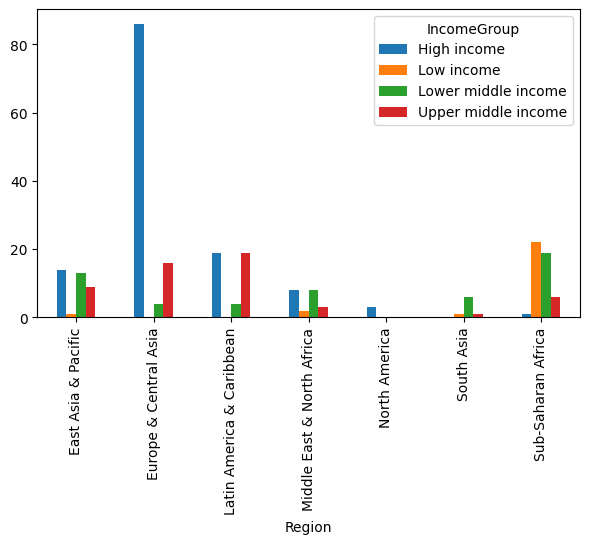

In [166]:
# Cross tabulation between Income group and Region
CrosstabResult=pd.crosstab(index=df['Region'],columns=df['IncomeGroup'])
 
# Grouped bar chart between Income group and Region
CrosstabResult.plot.bar(figsize=(7,4), rot=90)